## Chapter 16 - Plotting with a Series

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10, 5]


url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url, dtype_backend='pyarrow', engine='pyarrow')
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
        .SNOW
        .rename(dates))

<Axes: ylabel='Frequency'>

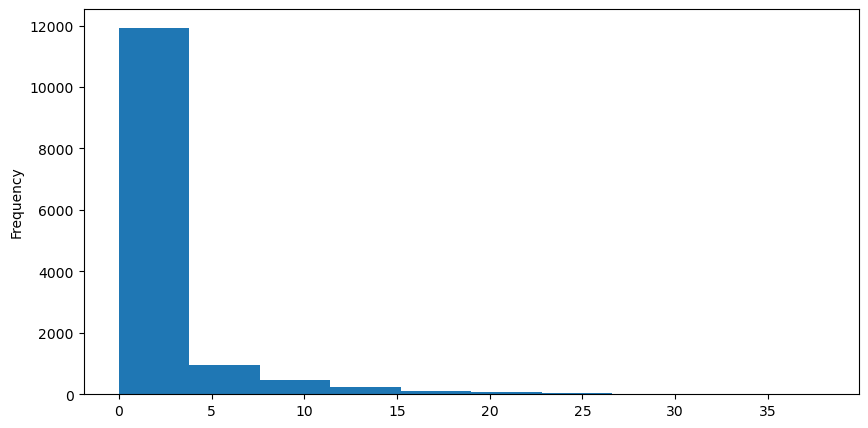

In [251]:
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

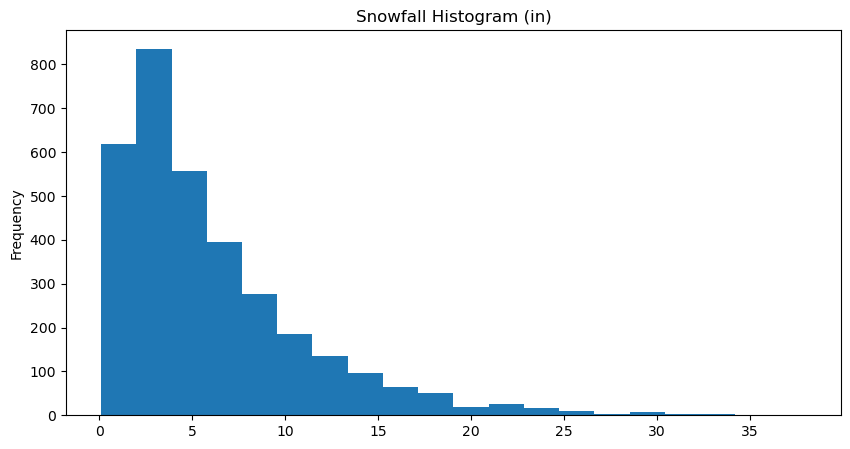

In [252]:
snow[snow > 0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: >

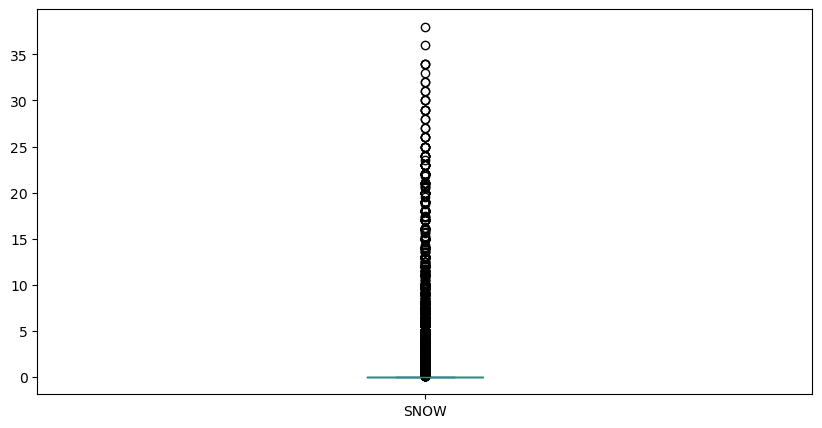

In [253]:
snow.plot.box()

<Axes: >

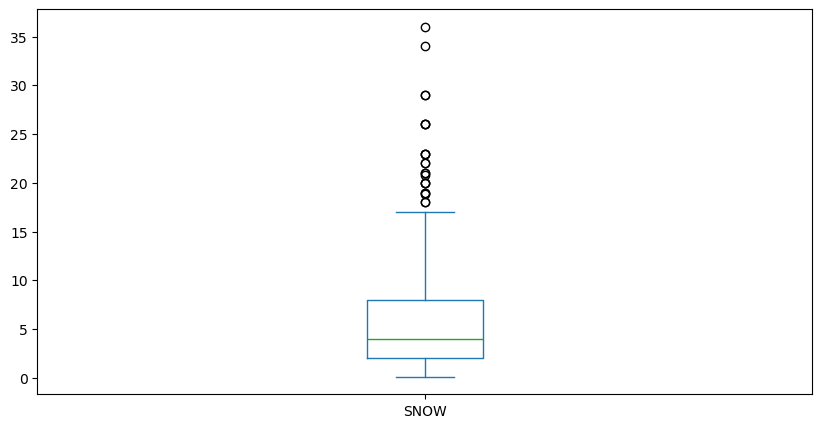

In [254]:
(snow
 [lambda s: (s.index.month == 1) & (s>0)]
 .plot.box())

<Axes: ylabel='Density'>

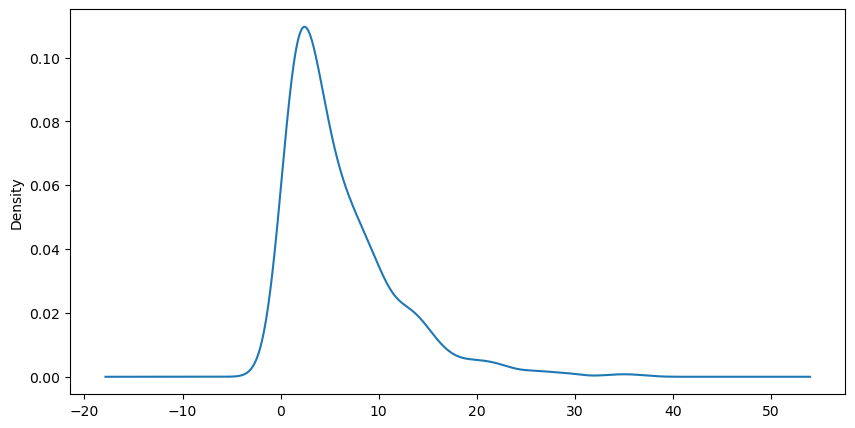

In [255]:
(snow
 [lambda s: (s.index.month == 1) & (s>0)]
 .plot.kde())

<Axes: >

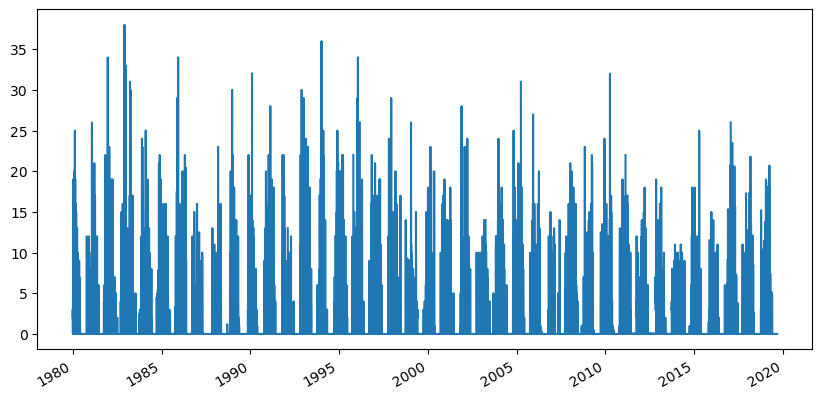

In [256]:
snow.plot.line()

<Axes: >

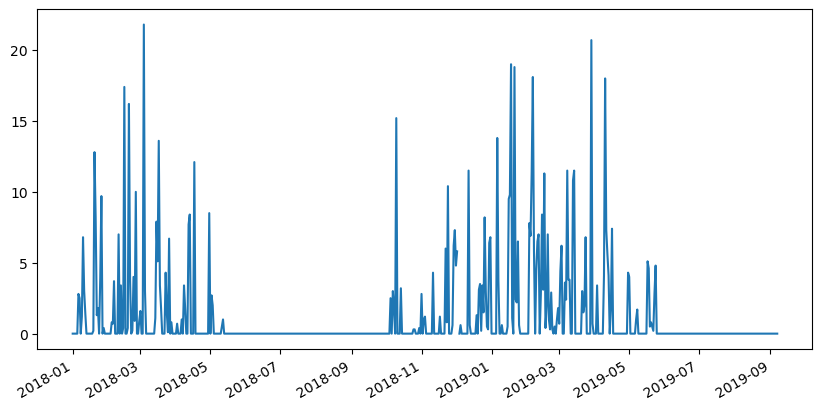

In [257]:
# clip the snow df to get dates in years 2018 and 2019
(snow
 ['2018':'2019']
 .plot.line())

<Axes: >

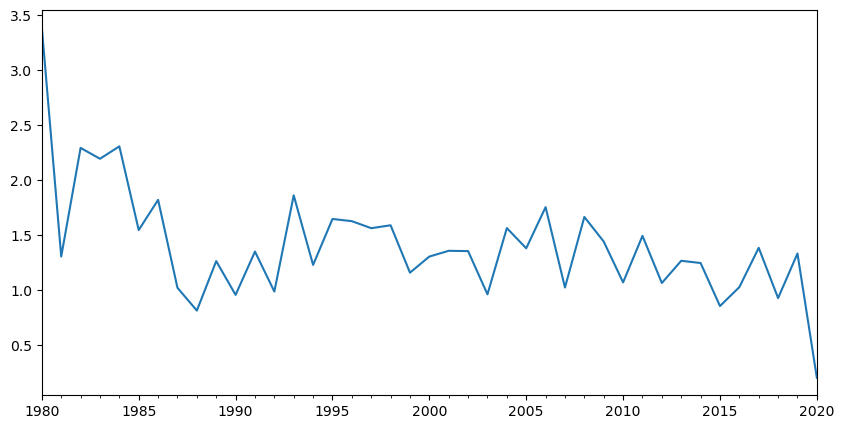

In [258]:
(snow
 .resample('YE-APR')
 .mean()
 .plot.line())

In [259]:
(snow
 .resample('QE')
 .quantile([0.5, 0.9, 0.99])
)

1980-03-31  0.50     1.00
            0.90    13.00
            0.99    20.50
1980-06-30  0.50     0.00
            0.90     4.00
                    ...  
2019-06-30  0.90     4.10
            0.99     8.46
2019-09-30  0.50     0.00
            0.90     0.00
            0.99     0.00
Name: SNOW, Length: 477, dtype: float64

In [260]:
(snow
 .resample('QE')
 .quantile([0.5, 0.9, 0.99])
 .unstack()
 .tail(100)
#  .plot.line()
)

,0.50,0.90,0.99
1994-12-31,0.0,9.00,21.480
1995-03-31,0.0,12.80,22.000
1995-06-30,0.0,4.30,12.260
1995-09-30,0.0,0.00,0.950
1995-12-31,0.0,6.10,15.770
...,...,...,...
2018-09-30,0.0,0.00,0.000
2018-12-31,0.0,5.80,11.870
2019-03-31,0.6,10.85,19.187
2019-06-30,0.0,4.10,8.460


<Axes: >

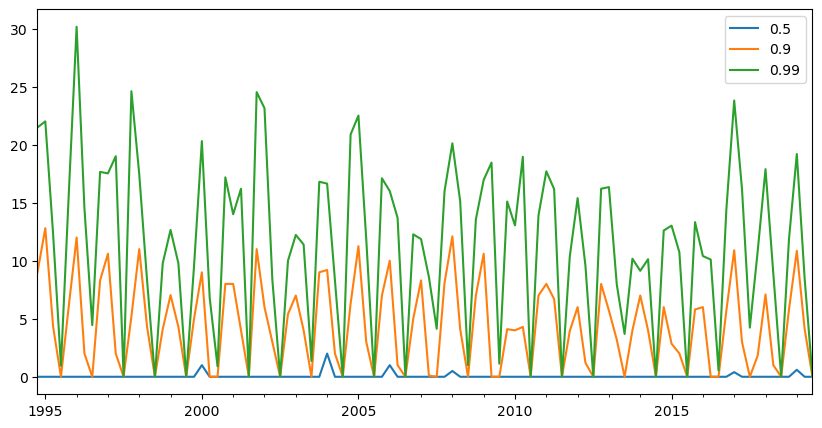

In [261]:
(snow
 .resample('QE')
 .quantile([0.5, 0.9, 0.99])
 .unstack()
 .tail(100)
 .plot.line()
)

In [262]:
# my own experimentation

by_year = (snow
           .groupby([snow.index.year, snow.index.month])
           .mean()
           .unstack(level=0))

by_year

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,4.645161,2.354839,4.612903,2.435484,1.354839,1.419355,1.806452,1.919355,2.517241,2.0,...,1.907407,1.325806,1.967742,1.486207,1.62,1.016667,3.0,4.256667,1.806452,2.854839
2,3.87931,2.928571,3.035714,2.428571,3.586207,2.196429,4.174074,1.240741,0.948276,2.946429,...,1.4375,3.811538,1.928571,2.269231,2.35,1.16,1.258621,3.767857,2.492857,3.953571
3,3.967742,3.548387,5.290323,5.16129,2.741935,3.209677,3.225806,2.1,2.653571,1.870968,...,1.4375,2.833333,2.034483,1.075862,1.943333,0.965517,1.954839,1.5,2.345161,3.012903
4,1.0,1.733333,2.433333,3.75,4.15,1.15,4.675862,0.586207,0.844828,1.533333,...,3.8,3.625,1.480769,1.857143,1.551724,1.45,1.166667,2.548276,1.453333,1.863333
5,1.516129,2.129032,0.774194,2.532258,0.887097,0.903226,2.867742,0.0,0.821429,0.129032,...,1.125,1.448276,0.363636,0.26,0.548387,0.64,0.080645,0.296774,0.2,0.83871
6,0.033333,0.3,0.333333,0.15,0.833333,0.14,0.0,0.0,0.0,0.0,...,0.016667,0.003704,0.0,0.0,0.607143,0.0,0.0,0.126667,0.0,0.0
7,0.0,0.0,0.064516,0.16129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.5,0.0,0.25,0.0,0.966667,0.0,0.073333,0.0,...,0.0,0.0,0.0,0.769231,0.0,0.0,0.2,0.671429,0.0,0.0
10,1.193548,2.112903,2.258065,0.403226,1.509677,0.793548,0.322581,0.0,0.0,0.0,...,0.919355,0.722222,0.823529,1.12963,0.048387,0.048387,0.348387,0.23,0.86129,<NA>


<Axes: >

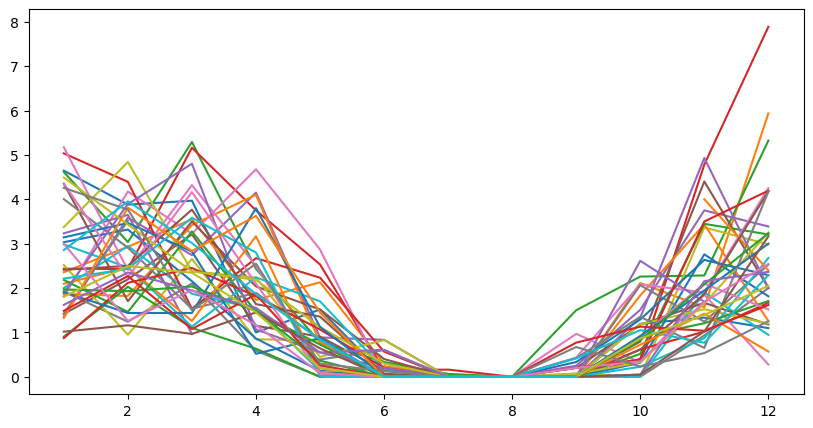

In [263]:
by_year.plot.line(legend=False)

In [264]:
by_month = (snow
            .rolling(30)
            .mean()
            .groupby([snow.index.year, snow.index.dayofyear])
            .agg(lambda s: s)
            .unstack(level=0))

by_month

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,NaN,1.133333,5.633333,3.333333,7.783333,3.333333,1.883333,NaN,NaN,NaN,...,2.433333,NaN,0.550000,3.200000,1.616667,2.443333,3.166667,2.46,NaN,NaN
2,NaN,1.133333,5.833333,2.866667,7.650000,3.333333,1.650000,NaN,NaN,NaN,...,2.516667,NaN,0.550000,3.200000,1.616667,2.410000,3.166667,2.85,NaN,1.696667
3,NaN,1.133333,6.366667,2.833333,7.216667,3.333333,1.566667,NaN,NaN,NaN,...,2.516667,NaN,0.550000,3.100000,1.250000,2.460000,3.166667,2.95,NaN,1.696667
4,NaN,0.833333,6.366667,2.816667,6.450000,3.333333,1.666667,NaN,NaN,3.083333,...,2.450000,NaN,0.483333,3.100000,1.300000,2.460000,3.166667,3.11,NaN,1.676667
5,NaN,0.900000,6.500000,2.883333,6.183333,3.333333,1.683333,NaN,NaN,3.083333,...,NaN,NaN,0.483333,3.050000,1.303333,2.460000,3.183333,3.27,NaN,1.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.133333,5.666667,5.800000,8.483333,4.033333,2.400000,NaN,1.700000,NaN,NaN,...,NaN,0.450000,3.083333,1.583333,2.126667,3.200000,NaN,NaN,NaN,NaN
363,1.133333,5.666667,5.700000,8.150000,4.133333,2.200000,NaN,1.700000,NaN,NaN,...,NaN,0.516667,3.216667,1.583333,2.460000,3.150000,2.826667,NaN,NaN,NaN
364,1.133333,5.633333,5.500000,7.916667,3.566667,2.000000,NaN,1.900000,NaN,NaN,...,NaN,0.516667,3.216667,1.583333,2.443333,3.183333,2.626667,NaN,NaN,NaN
365,1.133333,5.566667,4.600000,8.050000,3.400000,1.983333,NaN,2.066667,NaN,NaN,...,NaN,0.550000,3.233333,1.616667,2.443333,3.166667,2.626667,NaN,NaN,NaN


<Axes: >

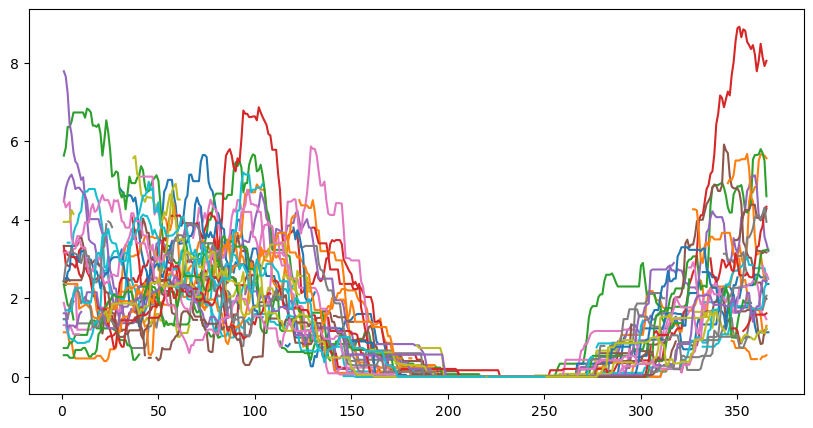

In [265]:
by_month.plot.line(legend=False)

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

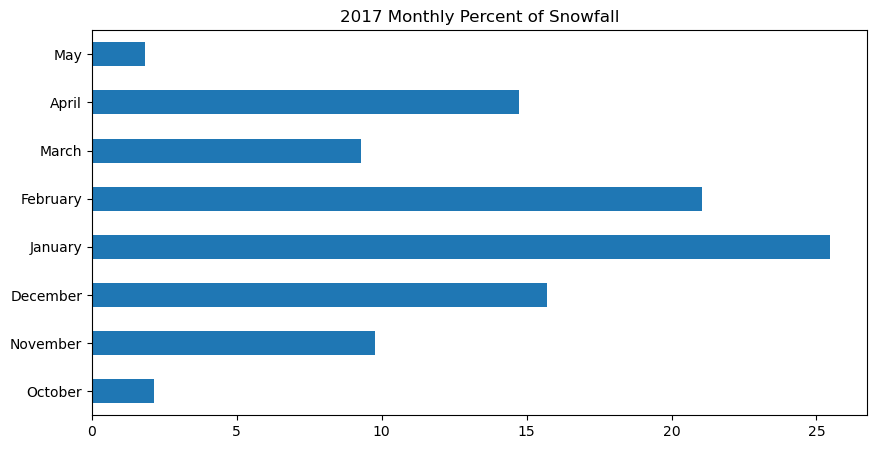

In [272]:
season2017 = snow.loc['2016-10':'2017-05']
# (season2017
#  .resample('ME')
#  .sum()
#  .div(season2017.sum())
#  .mul(100)
#  .rename(lambda idx: idx.month_name())
#  .plot.bar(title='2017 Monthly Percent of Snowfall'))

(season2017
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title='2017 Monthly Percent of Snowfall'))

In [274]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url, dtype_backend='pyarrow')
make = df.make
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string[pyarrow]

In [275]:
make.value_counts

<bound method IndexOpsMixin.value_counts of 0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string[pyarrow]>

<Axes: xlabel='make'>

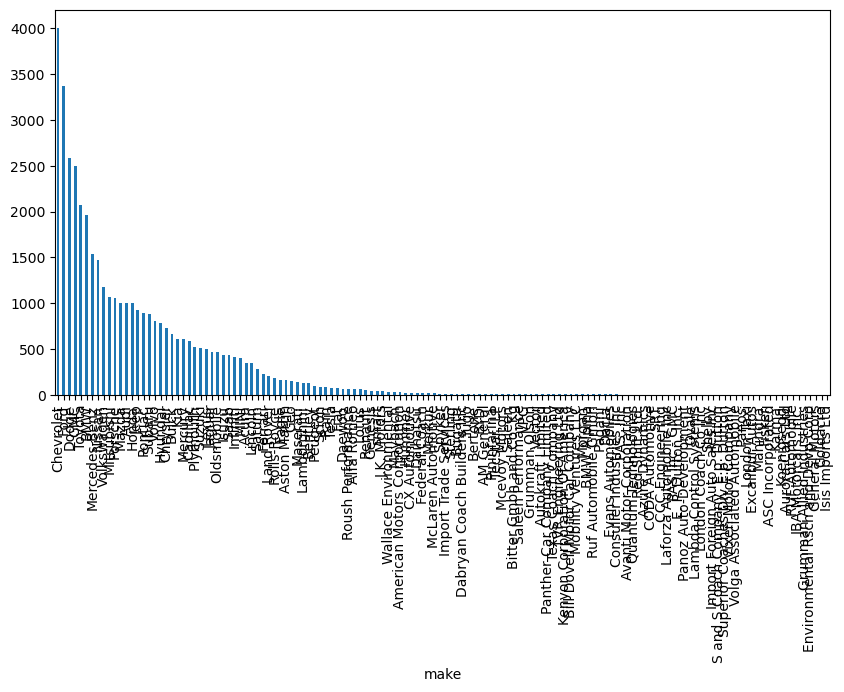

In [276]:
(make
 .value_counts()
 .plot.bar())

In [286]:
top10 = make.value_counts().index[:10]
top10

Index(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota', 'BMW', 'Mercedes-Benz', 'Nissan', 'Volkswagen', 'Mitsubishi'], dtype='string[pyarrow]', name='make')

<Axes: title={'center': 'Top 10 Vehicle Makes'}, ylabel='make'>

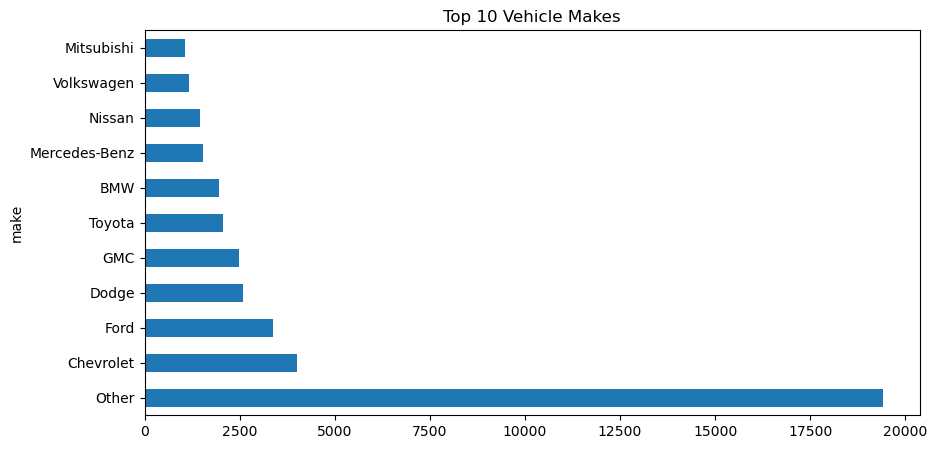

In [287]:

(make
 .where(make.isin(top10), 'Other')
 .value_counts()
 .plot.barh(title='Top 10 Vehicle Makes'))

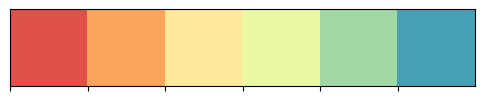

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = sns.color_palette('Spectral')
sns.palplot(color_palette)

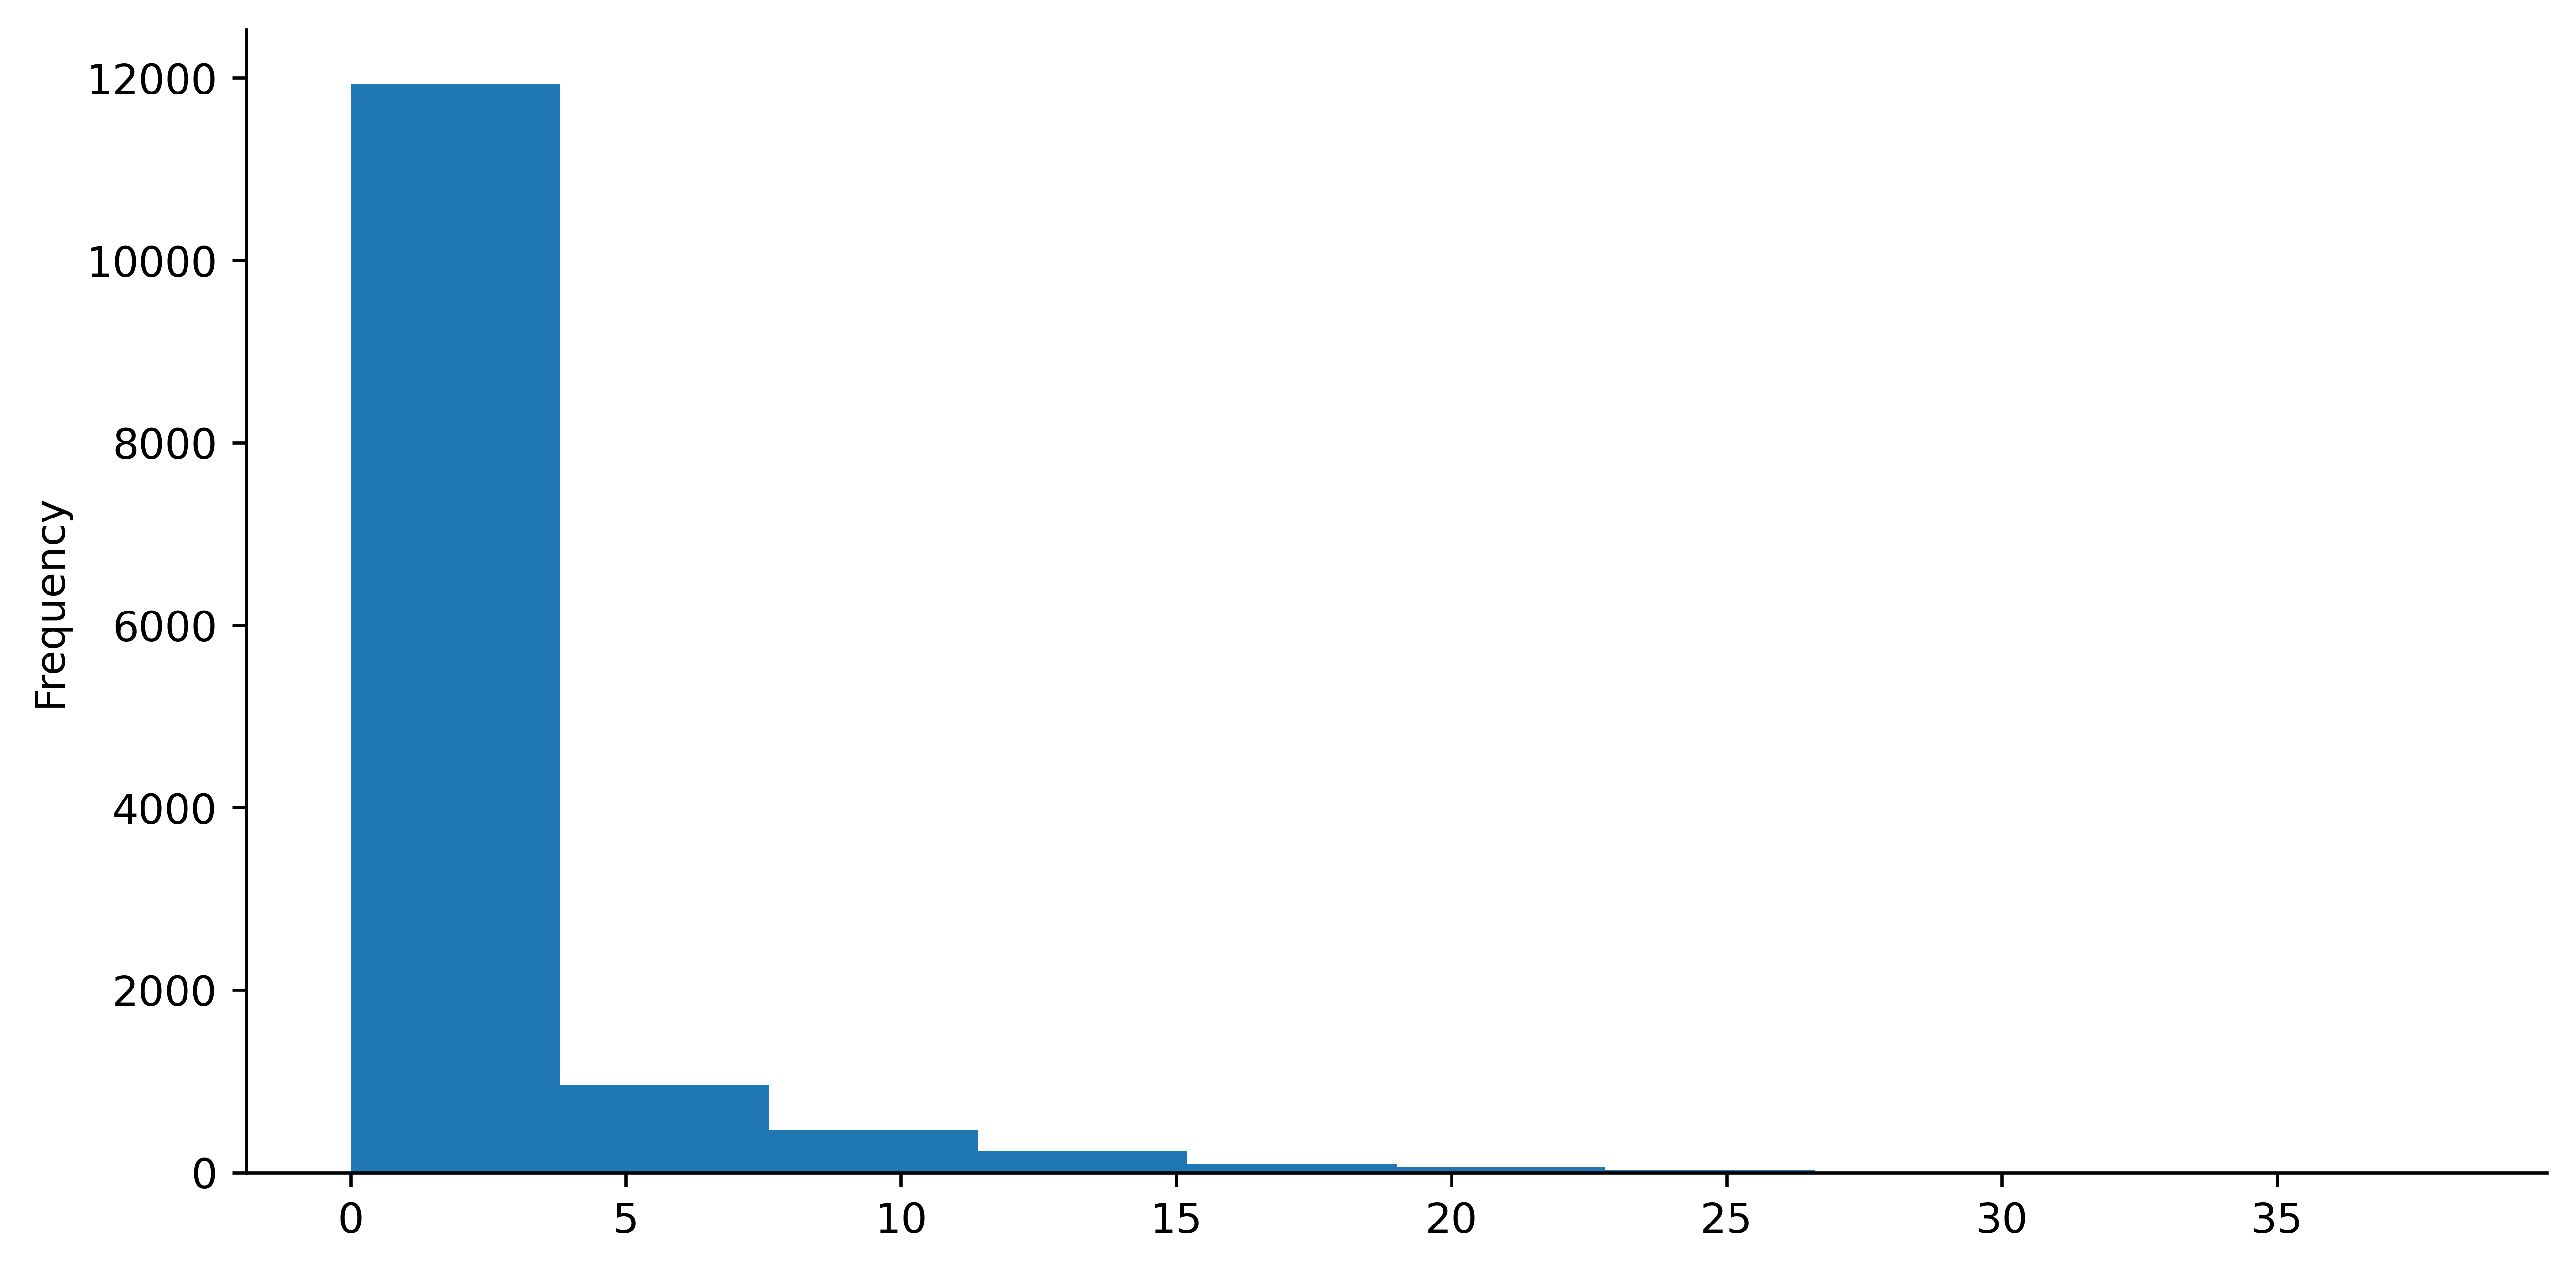

In [293]:
with sns.plotting_context(rc=dict(font='Roboto', palete=color_palette)):
    fig, ax = plt.subplots(dpi=600, figsize=(10,5))
    snow.plot.hist()
    sns.despine()
    fig.savefig('snow_hist.png', dpi=600, bbox_inches='tight')